In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [3]:
np.random.seed(2332321)

In [4]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [5]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2,cov_mat2,100)

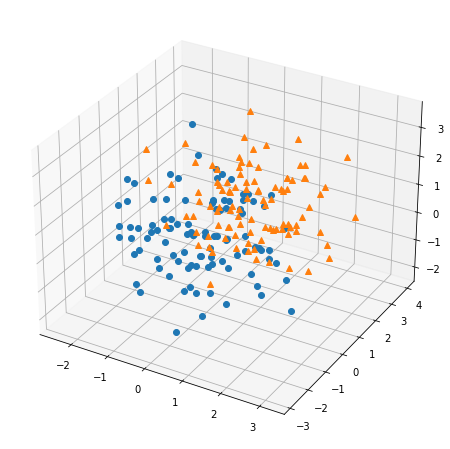

In [6]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection ='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')


In [7]:
pca = PCA(n_components = 2)
combined = np.concatenate((class1,class2))
transformed_data = pca.fit_transform(combined)

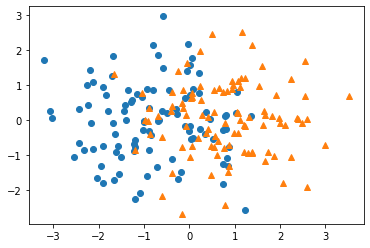

In [8]:
plt.plot(transformed_data[:100,0],transformed_data[:100,1],'o')
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],'^')
plt.show()

In [9]:
x_approx = pca.inverse_transform(transformed_data)
x_approx

array([[-9.39301147e-02,  1.11875169e-01,  2.26480170e-01],
       [ 8.06419647e-03, -2.09789733e-01, -5.28081755e-01],
       [ 2.02911592e-01, -6.36629614e-02, -4.51893772e-01],
       [-1.81062285e+00, -2.34736135e-01,  1.43247544e+00],
       [ 1.56827135e-01,  1.77428254e-01,  8.00975958e-02],
       [-2.03449596e+00, -7.00287905e-01,  7.51021218e-01],
       [-8.13998926e-01, -4.69692081e-02,  7.05483792e-01],
       [ 1.42134629e+00,  1.19470134e+00,  7.12099504e-01],
       [ 1.74134975e-01,  8.05902364e-01,  1.31496401e+00],
       [-2.77390633e-02, -2.21369217e-01, -5.11610306e-01],
       [-1.28930542e+00, -1.27751111e+00, -1.22443134e+00],
       [-1.44532042e+00, -7.85253652e-01, -6.97719103e-02],
       [ 9.74345653e-01,  1.14241256e+00,  1.10187115e+00],
       [-8.70476538e-01,  3.42970344e-01,  1.54596146e+00],
       [ 2.10489497e+00,  3.23079512e-01, -1.78263091e+00],
       [-2.14573205e-01,  9.02857929e-01,  1.93808869e+00],
       [-3.04315542e-01, -3.22572637e-01

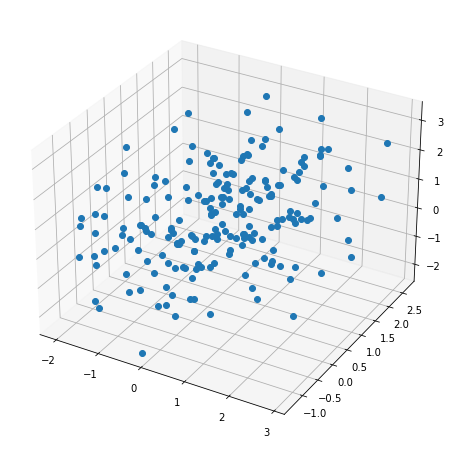

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection ='3d')
ax.plot(x_approx[:,0],x_approx[:,1],x_approx[:,2],'o')
#ax.plot(x_approx[:,0],x_approx[:,1],x_approx[:,2],'^')


In [17]:
combined = combined.T # transpose becuase we need covariance for features 
cov = np.cov(combined)
cov

array([[1.23398644, 0.29112351, 0.16703412],
       [0.29112351, 1.17498965, 0.30751335],
       [0.16703412, 0.30751335, 1.28853995]])

In [18]:
np.linalg.eig(cov)
# first array is the eigen values next 3 are eigen vectors
# coloumn wise vectors 

(array([1.74476043, 1.09316336, 0.85959226]),
 array([[-0.53546935, -0.71853849,  0.44381867],
        [-0.59635794, -0.05041723, -0.80113377],
        [-0.59802155,  0.69365737,  0.40150925]]))

In [22]:
eig_val ,eig_vectors = np.linalg.eig(cov)

In [23]:
eig_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:,i]
    eig_val_vector_pair.append((eig_val[i],eig_vec))
eig_val_vector_pair.sort(reverse = True)

In [24]:
eig_val_vector_pair

[(1.7447604328080248, array([-0.53546935, -0.59635794, -0.59802155])),
 (1.0931633566168366, array([-0.71853849, -0.05041723,  0.69365737])),
 (0.8595922566613434, array([ 0.44381867, -0.80113377,  0.40150925]))]